In [1]:
import pandas as pd

In [2]:
# Read our dataset using read_csv()
bbc_text = pd.read_csv('./bbc-text.csv')
bbc_text=bbc_text.rename(columns = {'text': 'News_Headline'}, inplace = False)
bbc_text.head()


,category,News_Headline
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


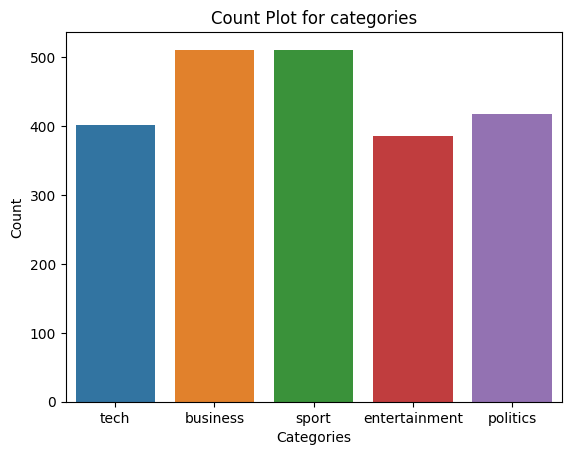

In [3]:
# Finding out the total number of plots and headlines:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'category',data = bbc_text)

plt.title('Count Plot for categories')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()


In [4]:
import nltk
from nltk.corpus import stopwords

# Download the stop words for English
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

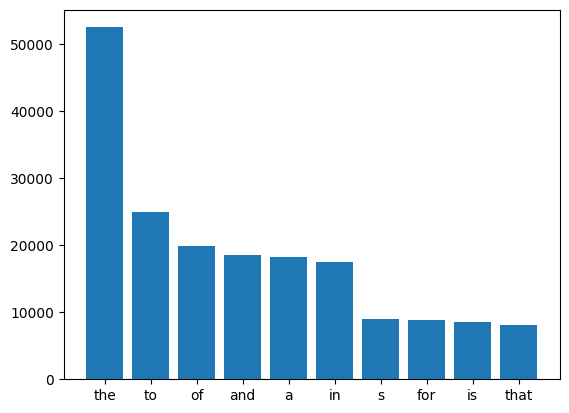

In [5]:
#Analysing stop words

def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1

    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(bbc_text['News_Headline'])


In [6]:
from collections import Counter

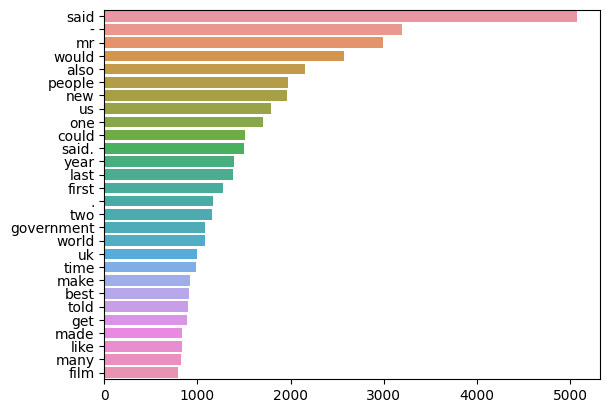

In [7]:
#Analysing most freqquently occuring words

def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)
top_frequent_words(bbc_text['News_Headline'])


In [10]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

nltk.download('punkt')  # Download NLTK data
nltk.download('wordnet')  # Download WordNet data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

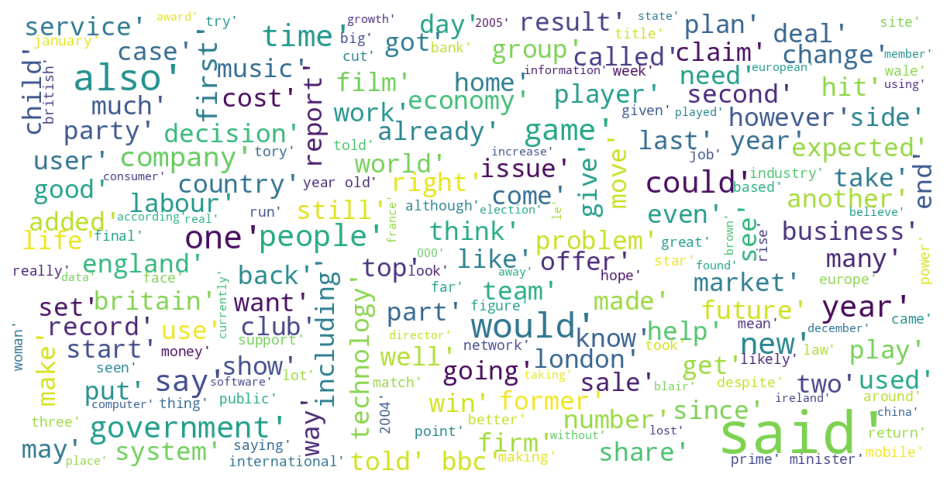

In [11]:
def plot_wordcloud(data):
    stop=set(stopwords.words('english'))
    def _preprocess_text(data):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in data:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(data)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=200,
        max_font_size=25,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
plot_wordcloud(bbc_text['News_Headline'])


In [12]:
bbc_text = bbc_text.apply(lambda x: x.astype(str).str.lower())

In [13]:
# Tokenization
bbc_text['text_clean'] = bbc_text['News_Headline'].apply(nltk.word_tokenize)
print('Step 1-Tokenization Done!.')
bbc_text.head()


Step 1-Tokenization Done!.


,category,News_Headline,text_clean
0,tech,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ..."


In [14]:
if len(bbc_text)==1:
  stop_words = set(stopwords.words('english'))
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  filtered_sentence = []
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
else:
  stop_words=set(nltk.corpus.stopwords.words("english"))
  bbc_text['text_clean'] = bbc_text['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
  print('Step 2-All stop words are removed from the list.')
  print(bbc_text.head(5))


Step 2-All stop words are removed from the list.
        category                                      News_Headline  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                                          text_clean  
0  [tv, future, hands, viewers, home, theatre, sy...  
1  [worldcom, boss, left, books, alone, former, w...  
2  [tigers, wary, farrell, gamble, leicester, say...  
3  [yeading, face, newcastle, fa, cup, premiershi...  
4  [ocean, twelve, raids, box, office, ocean, twe...  


In [16]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
bbc_text["text_clean"] = bbc_text["text_clean"].apply(lambda x: [stemmer.stem(y) for y in x])


In [20]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english' ,ngram_range=(1,1))

tf_idf1 = tf_idf.fit_transform(bbc_text['text_clean'].apply(lambda x: ' '.join(x)))

tf_idf1


<2225x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 177224 stored elements in Compressed Sparse Row format>

In [21]:
bbc_text.category = bbc_text.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
bbc_text.category.unique()


array([0, 1, 2, 3, 4])

In [25]:
from sklearn.model_selection import train_test_split

X = bbc_text['text_clean'].apply(lambda x: ' '.join(x))
y = bbc_text.category
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 1)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(stop_words = 'english',lowercase=False)
# fit the vectorizer on the training data
vector.fit(X_train)
vector.vocabulary_
X_transformed = vector.transform(X_train)
X_transformed.toarray()
# for test data
X_test_transformed = vector.transform(X_test)


In [27]:
from sklearn.naive_bayes import MultinomialNB
naivebayes = MultinomialNB()
naivebayes.fit(X_transformed, y_train)


MultinomialNB()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(naivebayes.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(naivebayes.predict(X_test_transformed), y_test))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.97      0.99      0.98       206
           2       0.98      1.00      0.99       194
           3       0.99      0.99      0.99       158
           4       0.99      0.95      0.97       176

    accuracy                           0.98       890
   macro avg       0.98      0.98      0.98       890
weighted avg       0.98      0.98      0.98       890



[[154   1   0   0   1]
 [  0 203   1   1   1]
 [  0   0 194   0   0]
 [  0   0   1 157   0]
 [  1   6   1   1 167]]


In [31]:
headline1 = ['Portugal crash out of FIFA World Cup 2022, Ronaldo in tears']
vec = vector.transform(headline1).toarray()
print('Headline:', headline1)
print(str(list(naivebayes.predict(vec))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))


Headline: ['Portugal crash out of FIFA World Cup 2022, Ronaldo in tears']
SPORTS


In [32]:
import pickle

# Assuming you have a trained Naive Bayes model named 'nb_classifier'
nb_classifier = naivebayes  # Your trained model

# Specify the file path where you want to save the model
model_filename = "naive_bayes_classifier.pkl"

# Save the model using pickle
with open(model_filename, 'wb') as model_file:
    pickle.dump(nb_classifier, model_file)


#Loading the saved model

In [33]:
# import pickle

# Load the saved model
model_filename = "naive_bayes_classifier.pkl"

# Using pickle
with open(model_filename, 'rb') as model_file:
    nb_classifier = pickle.load(model_file)

# Now you can use nb_classifier for making predictions


#Code to run the loaded model

In [35]:
#Take input
headline1 = ['Israel-Hamas war LIVE: Kin of Israeli hostages demand explanation of Gaza siege']
vec = vector.transform(headline1).toarray()
print('Headline:', headline1)
print(str(list(nb_classifier.predict(vec))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))


Headline: ['Israel-Hamas war LIVE: Kin of Israeli hostages demand explanation of Gaza siege']
POLITICS
